<a href="https://colab.research.google.com/github/visheshagrawal/Course-Computer-Vision/blob/main/CV_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
import cv2
 
img = cv2.imread('cv_img.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
width = 240
height = 240
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 

Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (240, 240, 3)


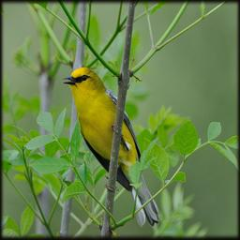

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

In [ ]:
def find_mean_std(array):
  blue_array=[]
  green_array=[]
  red_array=[]
  
  for i in range(array.shape[0]):
    for j in range(array.shape[1]):
      blue_array.append(array[i][j][0])
      green_array.append(array[i][j][1])
      red_array.append(array[i][j][2])
  
  blue_array=np.array(blue_array)
  green_array=np.array(green_array)
  red_array=np.array(red_array)

  return [np.mean(blue_array),np.mean(green_array),np.mean(red_array),np.std(blue_array),np.std(green_array),np.std(red_array)]


In [ ]:
def divide_image(array,num_k):
  out = [np.hsplit(x, num_k) for x in np.vsplit(array,num_k)]
  output=[]
  for i in range(num_k):
    for j in range(num_k):
      output.append(find_mean_std(out[i][j]))
  return output


In [ ]:
np.array(out).shape

(5, 5, 48, 48, 3)

In [ ]:
final = []
for i in (2,3,4,5):
  final+=divide_image(resized,i)
final_output = np.array(final)

In [ ]:
final_output = np.array(final)

In [ ]:
final_output

array([[ 76.44736111, 139.53083333, 116.32333333,  42.31036787,
         30.07384697,  32.3746885 ],
       [ 85.17145833, 130.52486111, 105.34576389,  23.00874482,
         26.60019724,  22.02281872],
       [ 62.40784722, 124.56229167,  94.21763889,  35.04024047,
         32.71957463,  26.38602313],
       [ 66.78291667, 124.88618056,  95.08034722,  31.88234817,
         31.64782822,  24.98431458],
       [ 88.8984375 , 140.6828125 , 116.034375  ,  34.27500452,
         32.05469961,  31.4958143 ],
       [ 81.57609375, 136.8415625 , 108.8225    ,  37.7609689 ,
         33.01666091,  30.8708154 ],
       [ 85.03265625, 126.46203125, 102.5828125 ,  19.34621319,
         24.6801311 ,  20.6919297 ],
       [ 73.594375  , 141.751875  , 106.279375  ,  40.1611461 ,
         23.5189484 ,  23.92850836],
       [ 45.13015625, 130.59125   , 115.8553125 ,  40.21580959,
         32.63577578,  34.44007481],
       [ 68.92      , 133.44375   ,  99.751875  ,  29.9695289 ,
         21.80411282,  17.4

In [ ]:
import pickle
with open('result_cvhw4.pkl','wb') as f: pickle.dump(final_output, f)